**Import Required Libraries**

In [2]:
from  sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**Read Data**

In [3]:
df=pd.read_csv('income.csv')

**Data Exploration**

In [4]:
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [7]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [8]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=22, step=1)

In [10]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

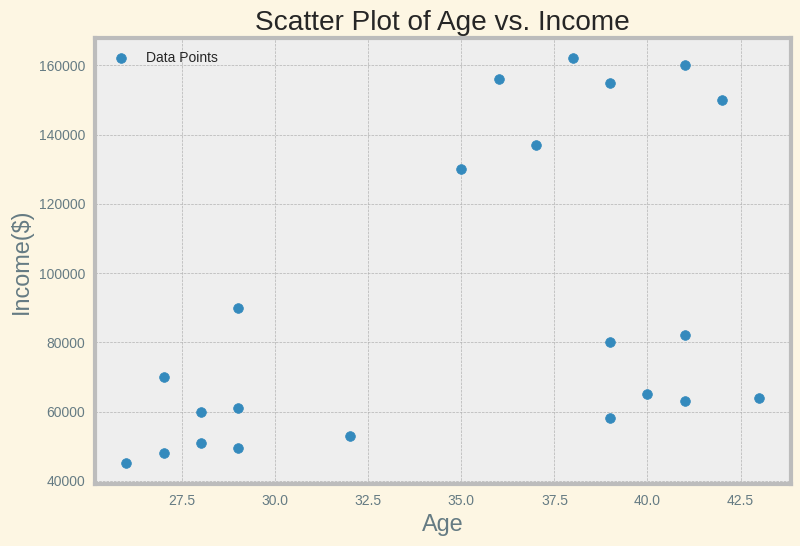

In [20]:
import matplotlib.pyplot as plt

# Your DataFrame df should be defined before this point.

# Set the style
plt.style.use('bmh')  # You can choose any style you prefer

# Create the scatter plot
plt.scatter(df['Age'], df['Income($)'], label='Data Points')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Scatter Plot of Age vs. Income')
plt.legend()

# Show the plot
plt.show()


**Get instance from KMeans**

In [21]:
model=KMeans(n_clusters=3)

**Get All Parameters of KMeans**

In [23]:
model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

**Train Model**

In [25]:
y_pred=model.fit_predict(df[['Age', 'Income($)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

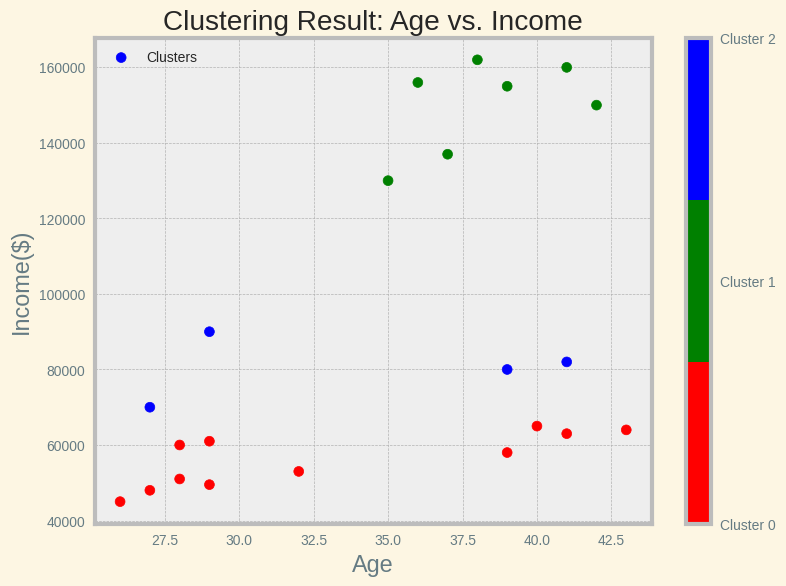

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_pred' contains the cluster labels

# Define a custom color map
colors = ['red', 'green', 'blue']  # Customize the colors as needed
cmap = plt.cm.colors.ListedColormap(colors)

# Create a scatter plot with the custom color map
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Income($)'], c=y_pred, cmap=cmap, marker='o', s=50, label='Clusters')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clustering Result: Age vs. Income')
plt.legend()

# Create a colorbar to show cluster-color mapping
cbar = plt.colorbar(scatter, ticks=np.arange(len(colors)))
cbar.set_ticklabels([f'Cluster {i}' for i in range(len(colors))])

# Show the plot
plt.show()


there are a problem in red and blue cluster

To solve the problem , we need to make scaling on input data

In [32]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [33]:
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [37]:
model_2=KMeans(n_clusters=3)

In [38]:
y_pred_2=model_2.fit_predict(df[['Age', 'Income($)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
y_pred_2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

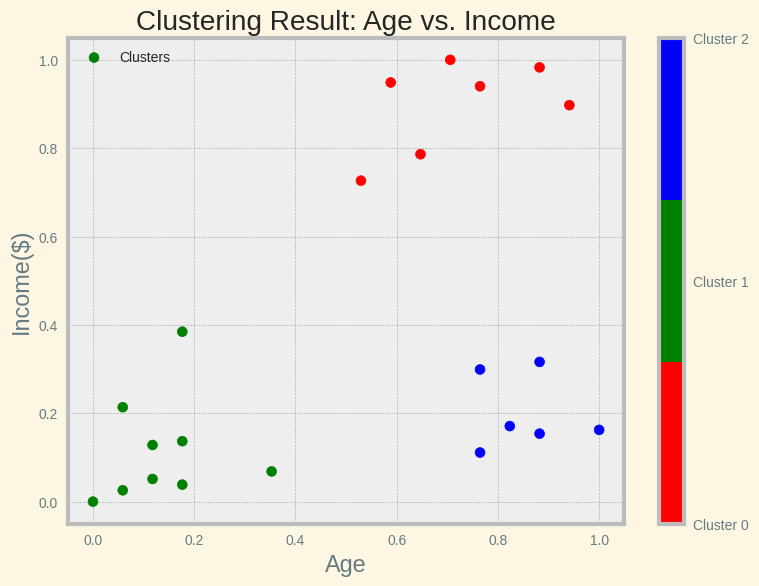

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_pred' contains the cluster labels

# Define a custom color map
colors = ['red', 'green', 'blue']  # Customize the colors as needed
cmap = plt.cm.colors.ListedColormap(colors)

# Create a scatter plot with the custom color map
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Income($)'], c=y_pred_2, cmap=cmap, marker='o', s=50, label='Clusters')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clustering Result: Age vs. Income')
plt.legend()

# Create a colorbar to show cluster-color mapping
cbar = plt.colorbar(scatter, ticks=np.arange(len(colors)))
cbar.set_ticklabels([f'Cluster {i}' for i in range(len(colors))])

# Show the plot
plt.show()


**Get position of each cluster**

In [41]:
model_2.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

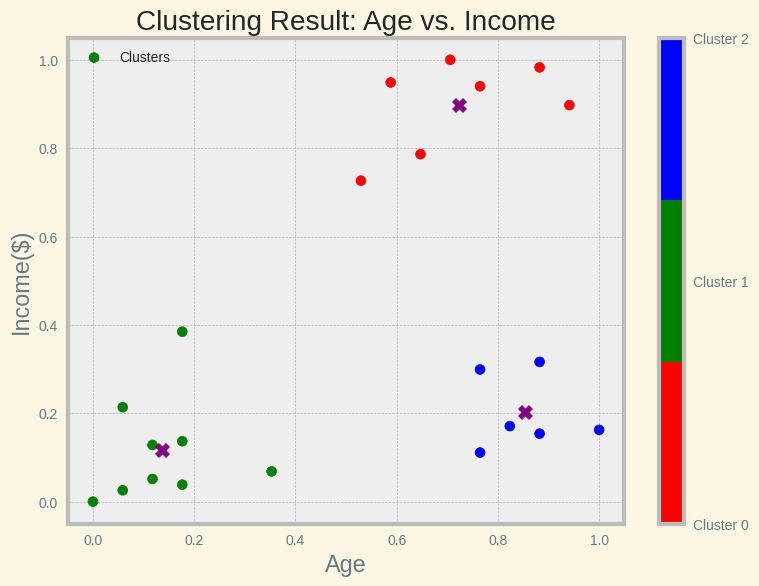

In [44]:
import matplotlib.pyplot as plt

# Assuming 'y_pred_2' contains the cluster labels
# Assuming 'model_2.cluster_centers_' contains the cluster centers

# Define a custom color map
colors = ['red', 'green', 'blue']  # Customize the colors as needed
cmap = plt.cm.colors.ListedColormap(colors)

# Create a scatter plot with the custom color map for data points
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Income($)'], c=y_pred_2, cmap=cmap, marker='o', s=50, label='Clusters')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clustering Result: Age vs. Income')
plt.legend()

# Plot the cluster centers as distinct points with a different color (e.g., 'purple')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='purple', marker='X', s=100, label='Cluster Centers')

# Create a colorbar to show cluster-color mapping
cbar = plt.colorbar(scatter, ticks=np.arange(len(colors)))
cbar.set_ticklabels([f'Cluster {i}' for i in range(len(colors))])

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


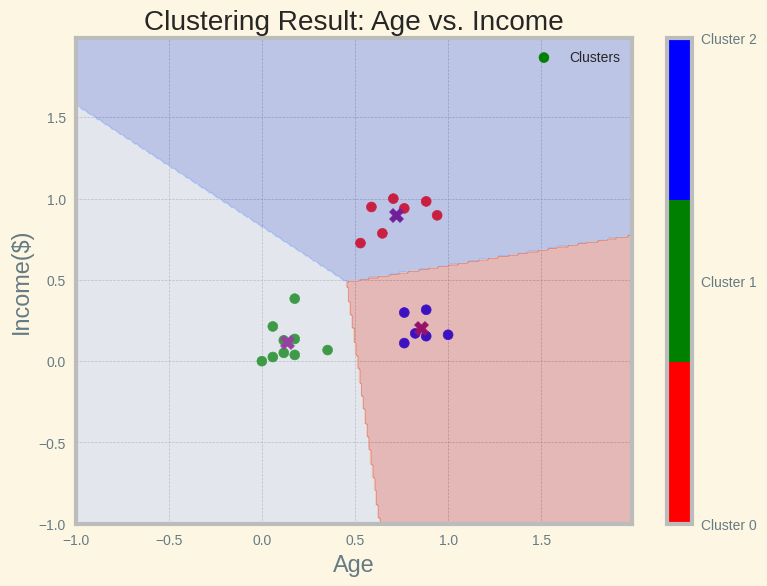

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_pred_2' contains the cluster labels
# Assuming 'model_2.cluster_centers_' contains the cluster centers

# Define a custom color map
colors = ['red', 'green', 'blue']  # Customize the colors as needed
cmap = plt.cm.colors.ListedColormap(colors)

# Create a scatter plot with the custom color map for data points
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Income($)'], c=y_pred_2, cmap=cmap, marker='o', s=50, label='Clusters')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clustering Result: Age vs. Income')
plt.legend()

# Plot the cluster centers as distinct points with a different color (e.g., 'purple')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], c='purple', marker='X', s=100, label='Cluster Centers')

# Create a colorbar to show cluster-color mapping
cbar = plt.colorbar(scatter, ticks=np.arange(len(colors)))
cbar.set_ticklabels([f'Cluster {i}' for i in range(len(colors))])

# Create boundaries for each cluster
x_min, x_max = df['Age'].min() - 1, df['Age'].max() + 1
y_min, y_max = df['Income($)'].min() - 1, df['Income($)'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Show the plot
plt.show()


Lets get the best number of clusters using **Elbow Method**

In [46]:
k_range=range(1,10)

In [47]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

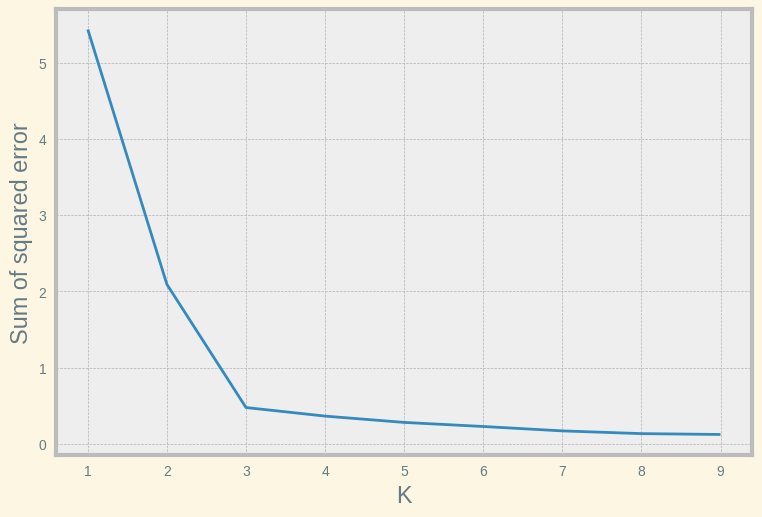

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**The best Value of "K" is  3** because when k=3 , the error or distortion is very small and the model not suffer from overfitting